In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad, Adam

from IPython.display import display, clear_output
import time

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

trial_optimizers = [
    keras.optimizers.SGD(learning_rate=0.01),
    keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    keras.optimizers.RMSprop(learning_rate=0.001),
    keras.optimizers.Adam(learning_rate=0.001),
    keras.optimizers.Adagrad(learning_rate=0.01),
    keras.optimizers.Adadelta(learning_rate=1.0),
    keras.optimizers.Adamax(learning_rate=0.002),
    keras.optimizers.Nadam(learning_rate=0.002)
]

trial_optimizers_names = [
    'SGD', 'SGD with Momentum', 'RMSprop', 'Adam', 
    'Adagrad', 'Adadelta', 'Adamax', 'Nadam'
]

In [27]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


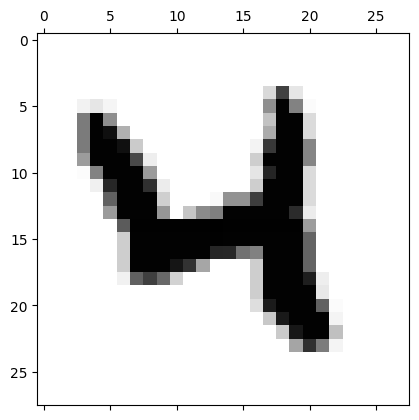

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [28]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


In [29]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [30]:
def compile_model(optimizer_index):
    # Crea il tuo modello qui
    model = keras.Sequential([
        # Aggiungi i tuoi layer qui
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')  
    ])
    
    model.compile(
        optimizer=trial_optimizers[optimizer_index],
        loss='categorical_crossentropy',  # o 'sparse_categorical_crossentropy'
        metrics=['accuracy']
    )
    
    return model

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.6609 - loss: 1.1540 - val_accuracy: 0.9077 - val_loss: 0.3284
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8909 - loss: 0.3778 - val_accuracy: 0.9246 - val_loss: 0.2547
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9133 - loss: 0.2990 - val_accuracy: 0.9363 - val_loss: 0.2141
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9263 - loss: 0.2511 - val_accuracy: 0.9441 - val_loss: 0.1866
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9344 - loss: 0.2238 - val_accuracy: 0.9495 - val_loss: 0.1650
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9422 - loss: 0.1976 - val_accuracy: 0.9544 - val_loss: 0.1506
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9478 - loss: 0.1795 - val_accuracy: 0.9581 - val_loss: 0.1389
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.9516 -

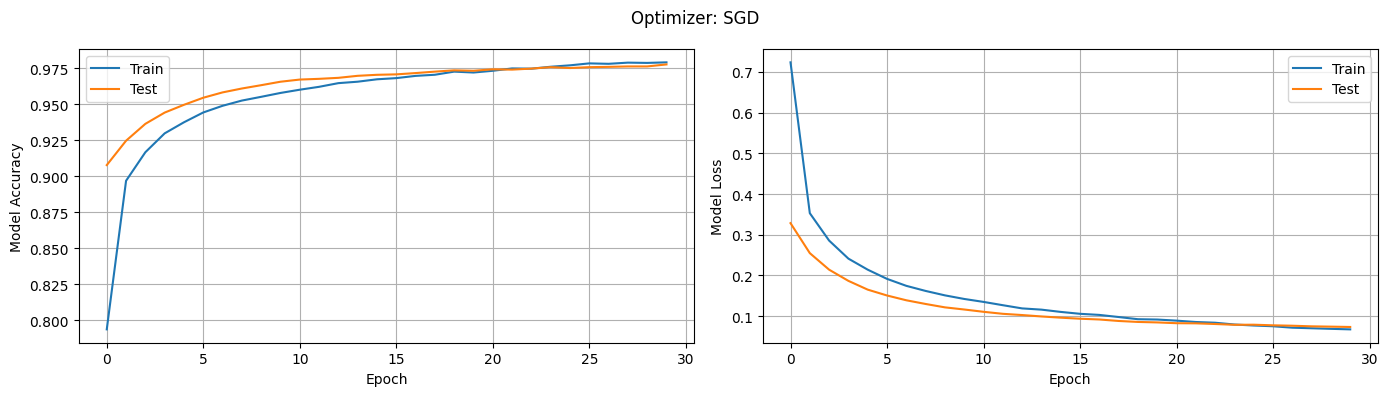

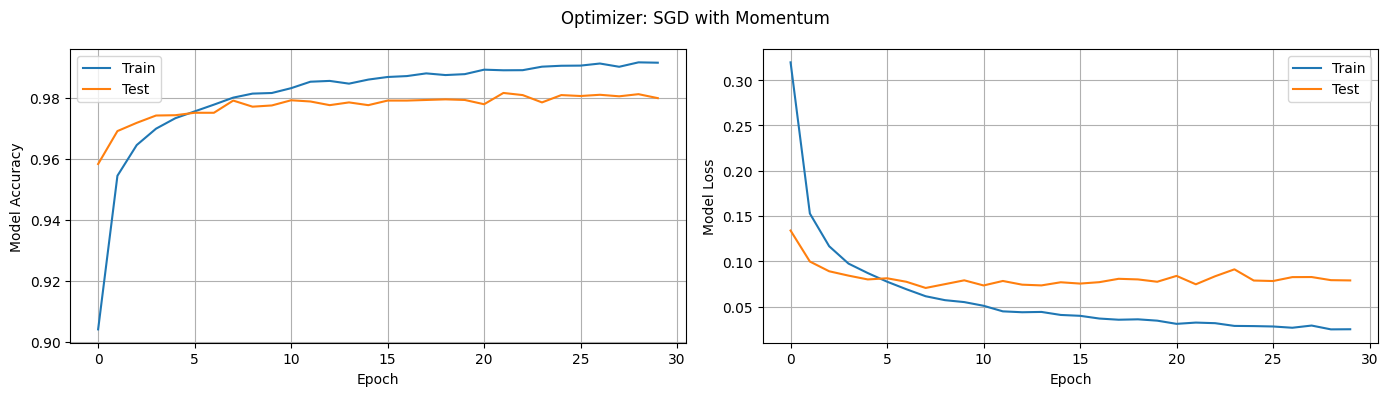

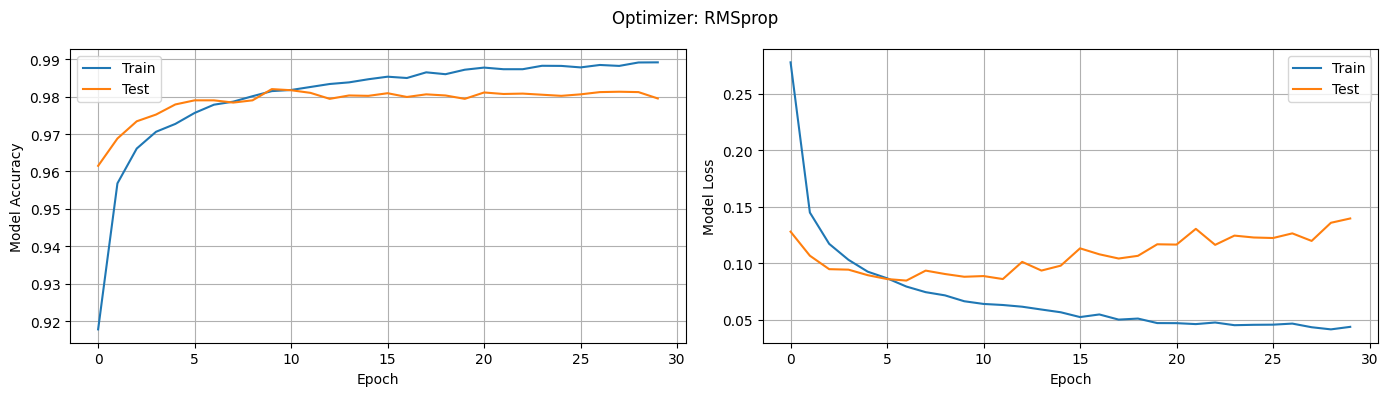

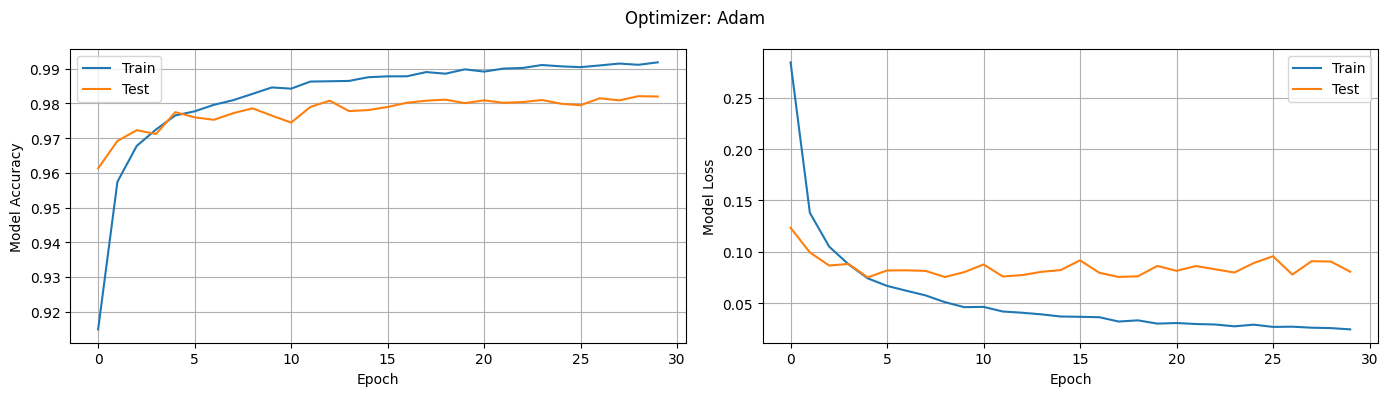

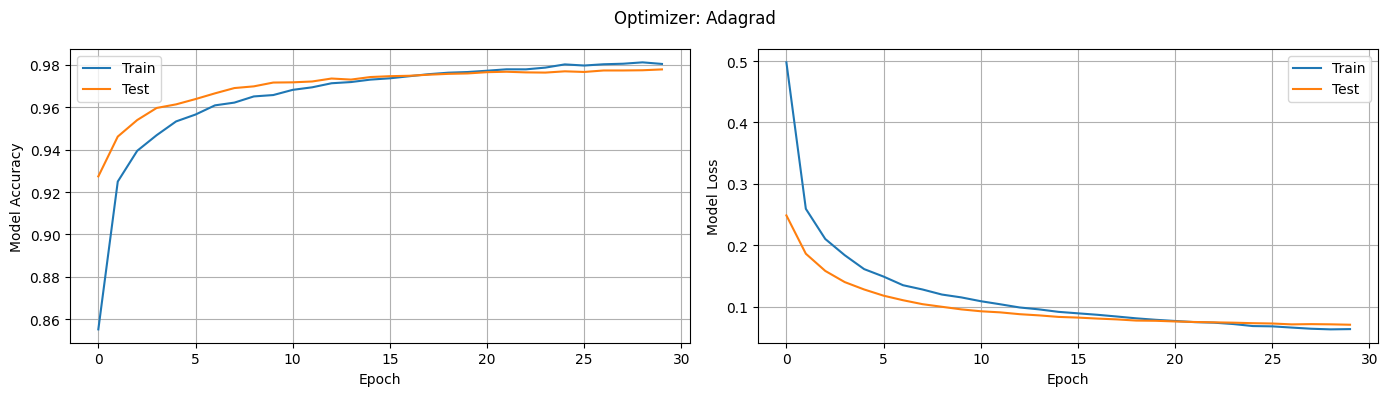

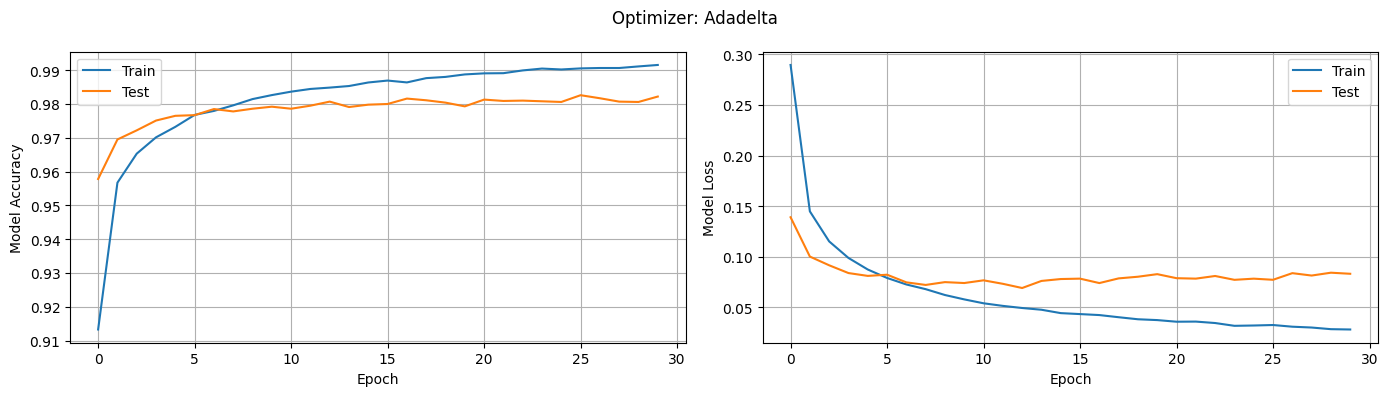

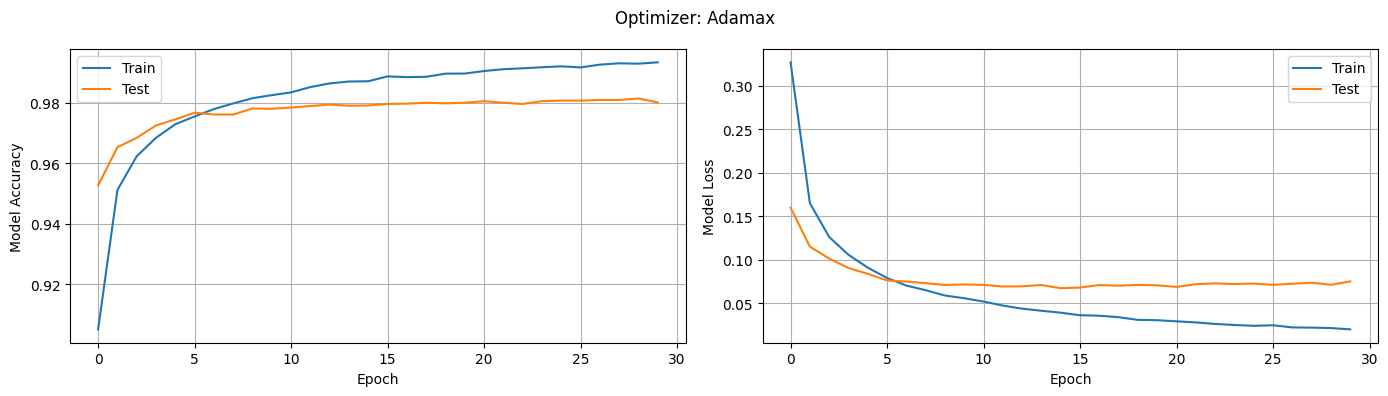

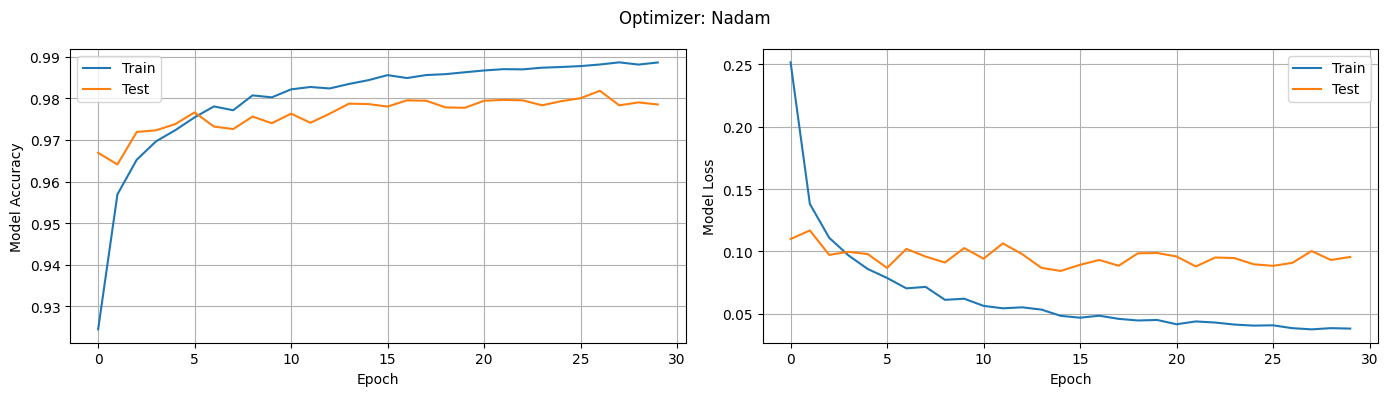

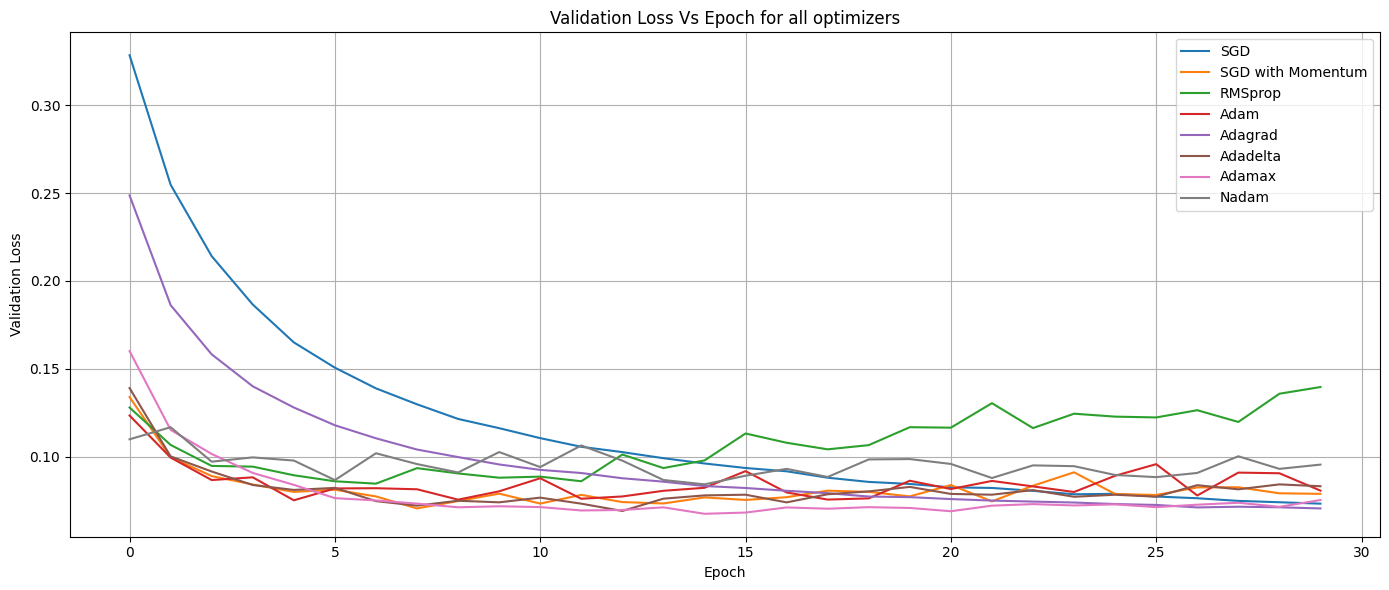

In [31]:
batch_size = 32
epochs = 30
loss = []
accuracy = []
loss_history = []
figs = []

for i in range(len(trial_optimizers)):
    model_DNN = compile_model(i)
    
    # Fitting
    history = model_DNN.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_test, Y_test))
    
    # Evaluating
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)
    loss.append(score[0])
    accuracy.append(score[1])
    loss_history.append(history.history['val_loss'])
    
    # Plotting - NOTA: In Keras 3 usa 'accuracy' invece di 'acc'
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle('Optimizer: ' + trial_optimizers_names[i])
    
    # accuracy - Cambiato da 'acc' a 'accuracy'
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_ylabel('Model Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='best')
    axs[0].grid(True)
    
    # loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_ylabel('Model Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='best')
    axs[1].grid(True)
    
    plt.tight_layout()
    figs.append(fig)

for fig in figs:
    display(fig)
plt.close('all')

# Plot finale
fig, ax = plt.subplots(figsize=(14, 6))
for i, opt_name in enumerate(trial_optimizers_names):
    ax.plot(loss_history[i], label=opt_name)
ax.set_title('Validation Loss Vs Epoch for all optimizers')
ax.set_ylabel('Validation Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()

In [32]:

best_optimizer = 4 # Adagrad

model_DNN = compile_model(best_optimizer)

# Fit the model
history = model_DNN.fit( X_train, Y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(X_test, Y_test) )
# Evaluate the model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

Epoch 1/30


NotImplementedError: numpy() is only available when eager execution is enabled.